# <center> Продвинутое машинное обучение
## <center> Домашнее задание № 1

## <center> Хуббатулин Марк. Группа DS2-1

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette()
figsize = (16, 9)
legend_fontsize = 16

# <center> Часть I: О теореме Байеса

> 1.) Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”.

> В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Обозначим: 

$\rho(b) = 0.01 $ - вероятность редкой крови, $\rho(\overline{b}) = 0.99 $ - вероятность не редкой крови \
$ g $ - событие того, что подсудимый виновен , $\overline{g}$ - событие того, что подсудимый виновен \
$ \rho (b|\overline{g}) $ - вероятность того, что у невиновного человека редкая группа крови 

Прокурор говорит верно, что $ \rho (b|\overline{g}) = 0.01$ \
Предположим, что есть число людей n, которые могли бы быть виновны, тогда

| | Виновные  | Невиновные | Общее число |
|-----| ------------- | ------------- | ------------- |
|Редкая кровь| 1  | n * 0.01 - 1 | n * 0.01 |
|Не редкая кровь| 0 | n * 0.99 | n * 0.99 |
|Общее число| 1 | n - 1 | n|

Это чисто n - скорее всего будет достаточно большое, и вероятность иметь редкую кровь при том условии, что подсудимый невиновен действительно практически 0.01 \
Затем прокурор говорит, что тогда вероятность виновности равна 99%.  Похоже из предположений $\rho (g) = 1 -\rho (b|\overline{g}) = 0.99$. Но это считается не так, в этом прокурор неправ. 
Это скорее похоже на вероятность $\rho( \overline{b}| \overline{g})$ \
Да и прокурор должен был оценить условную вероятность $\rho (g|b)$. 

> 2.) Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. 

> В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Теперь число n = 1000000, матрица теперь выглядит следующим образом:

| | Виновные  | Невиновные | Общее число |
|-----| ------------- | ------------- | ------------- |
|Редкая кровь| 1  | 009999| 0010000 |
|Не редкая кровь| 0 | 990000 | 0990000 |
|Общее число| 1 | 999999 | 1000000|

Тут похоже адвокат всё таки применил теорему Байеса и находит условную вероятность виновности при условии, что у подсудимого редкая кровь

In [2]:
n = 1000000
result = ((1 * (1 / n) / (1 * (1 / n) + (0.01 * ((n - 1) / n)))))
print("{:.4f}".format(result))

0.0001


$$ \rho (g|b ) = \frac{\rho (b|g) \cdot \rho(g)} {\rho (b)} = $$ \
$$ \frac{\rho (b|g) \cdot \rho (g)} {\rho (b|g) \cdot \rho (g) + \rho (b|\overline{g}) \cdot \rho(\overline{g})} = $$ \
$$ \frac{1 \cdot \frac{1}{\cdot 10^{7}}} {1 \cdot \frac{1}{\cdot 10^{7}} + 0.01 \cdot \frac{\cdot 10^{7} - 1}{\cdot 10^{7}}} = $$  \
$$ 0.0001 \cdot 100 = 0.01 \% $$

Ну и вероятность, что подсудимый совершил убийство при том условии, что у него редкая кровь действительно 0.01%. Но при этом он сделал предположение, что вероятность быть действительно убийцей равновероятна, что скорее делать нельзя. Достаточно большое количество людей не могла быть убийцей из-за алиби и т.п. Поэтому и говорить, о вероятности быть виновны 0.01% при условии редкой крови нельзя. В этом неправ адвокат. Условную вероятность виновности при редкой крови он оценил, и её и нужно оценивать. Но как оценить априорную вероятность быть убийцей это большой вопрос - возможно даже никак. Но также наличие редкой крови очень сильно увеличило вероятность быть истинным убицей подсудимого, так что этот факт достаточно весомый и его исключать нельзя.

> 3.) Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

> Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


Давайте посмотрим график зависимости апостериорной вероятности болезни при $fpr$ и $fnr = 0.05$

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


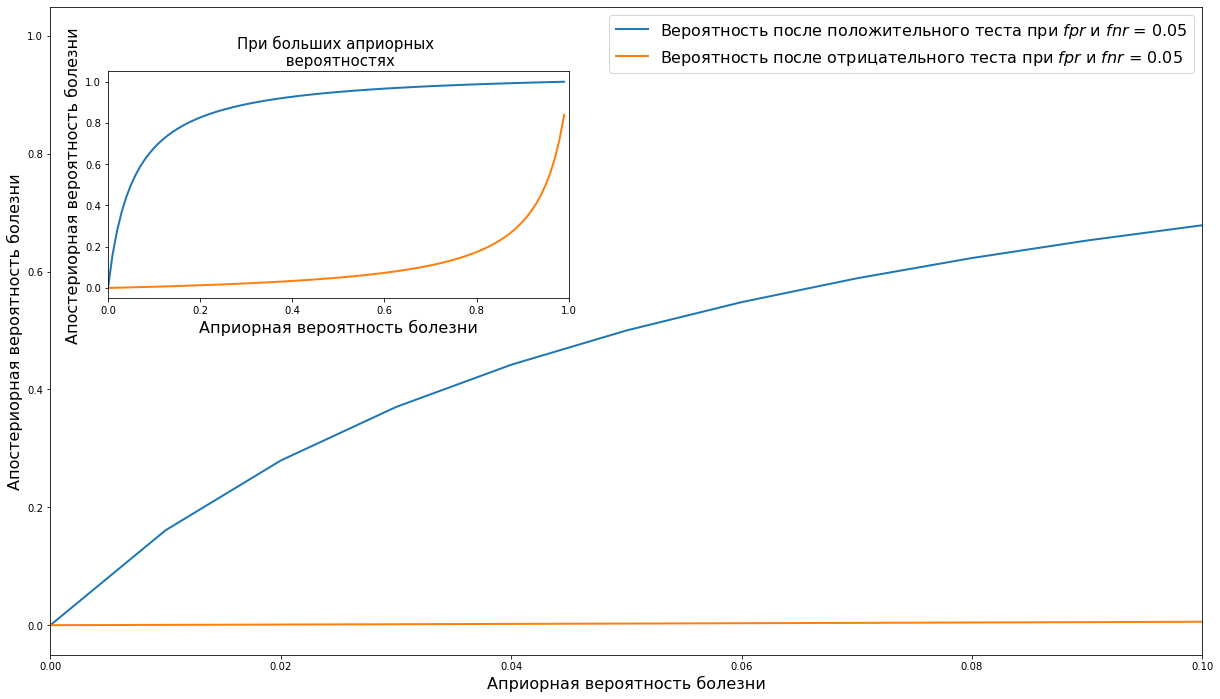

In [3]:
def compute_posterior(data, prior_prob=0.01, fpr=0.05, fnr=0.05):
    if data == 1:
        return prior_prob * (1 - fnr) / (fpr * (1 - prior_prob) + (1 - fnr) * prior_prob)
    elif data == 0:
        return prior_prob * fnr / ((1 - fpr) * (1 - prior_prob) + fnr * prior_prob)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 1, 0.01)
ys_one = vector_posterior(1, prior_prob=xs)
ys_zero = vector_posterior(0, prior_prob=xs)
fpr, fnr = 0.05, 0.05

fig = plt.figure(figsize=figsize)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(xs, ys_one, linewidth=2, label=f'Вероятность после положительного теста при $fpr$ и $fnr$ = {"{:.2f}".format(fpr)}')
axes.plot(xs, ys_zero, linewidth=2, label=f'Вероятность после отрицательного теста при $fpr$ и $fnr$ = {"{:.2f}".format(fnr)}')
axes.set_xlim((0.0, 0.1))
axes.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
axes.set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
axes.legend(loc=1, fontsize=legend_fontsize)

axes = fig.add_axes([0.05, 0.55, 0.4, 0.35])
axes.set_title('При больших априорных \n вероятностях', fontsize = 15)
axes.plot(xs, ys_one, linewidth=2, label=f'Вероятность после положительного теста при  $fpr$ = {"{:.2f}".format(fpr)}')
axes.plot(xs, ys_zero, linewidth=2, label=f'Вероятность после отрицательного теста при $fnr$ = {"{:.2f}".format(fnr)}')
    
axes.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
axes.set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
axes.set_xlim((0.0, 1))

plt.show()

In [4]:
def plot_fpr_fnr(fpr):
    """fpr=True, fnr=False"""
    ys_one = []
    ys_zero = []
    colors = ['b', 'g', 'r', 'c', 'm']
    fpr_fnr_list = np.arange(0.05, 0, -0.01)

    for fpr_fnr in fpr_fnr_list:
        vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
        xs = np.arange(0, 1, 0.01)
        if fpr:
            ys_one.append(vector_posterior(1, prior_prob=xs, fpr=fpr_fnr))
            ys_zero.append(vector_posterior(0, prior_prob=xs, fpr=fpr_fnr))
            status = 'fpr'
        elif fnr:
            ys_one.append(vector_posterior(1, prior_prob=xs, fnr=fpr_fnr))
            ys_zero.append(vector_posterior(0, prior_prob=xs, fnr=fpr_fnr))
            status = 'fnr'
        else:
            pass
        
    fig, axes = plt.subplots(2, 2, figsize=(23, 20))
    for one, zero, fpr_fnr, clr in zip(ys_one, ys_zero, fpr_fnr_list, colors):
        axes[0][0].plot(xs, one, clr, linewidth=2, label=f'Вероятность после положительного теста при {status} = {"{:.2f}".format(fpr_fnr)}')
        axes[0][1].plot(xs, one, clr, linewidth=2, label=f'Вероятность после положительного теста при {status} = {"{:.2f}".format(fpr_fnr)}')
    axes[0][0].set_xlim((0, 0.1))
    axes[0][1].set_xlim((0, 1))
    for i in range(2):
        axes[0][i].set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
        axes[0][i].set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
    axes[0][0].legend(loc=0, fontsize=12)

    for one, zero, fpr_fnr, clr in zip(ys_one, ys_zero, fpr_fnr_list, colors):
        axes[1][0].plot(xs, zero, clr, linewidth=2, label=f'Вероятность после отрицательного теста при {status} = {"{:.2f}".format(fpr_fnr)}')
        axes[1][1].plot(xs, zero, clr, linewidth=2, label=f'Вероятность после отрицательного теста при {status} = {"{:.2f}".format(fpr_fnr)}')
    axes[1][0].set_xlim((0, 0.1))
    axes[1][1].set_xlim((0, 1))
    for i in range(2):
        axes[1][i].set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
        axes[1][i].set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
    axes[1][0].legend(loc=0, fontsize=12)

    fig.suptitle(f"Зависимость апостериорной вероятности болезни от априорной вероятности болезни \n При различных ${status}$", fontsize=21)
    plt.show() 

Теперь посмотрим график зависимости апостериорной вероятности болезни при уменьшении $fpr$

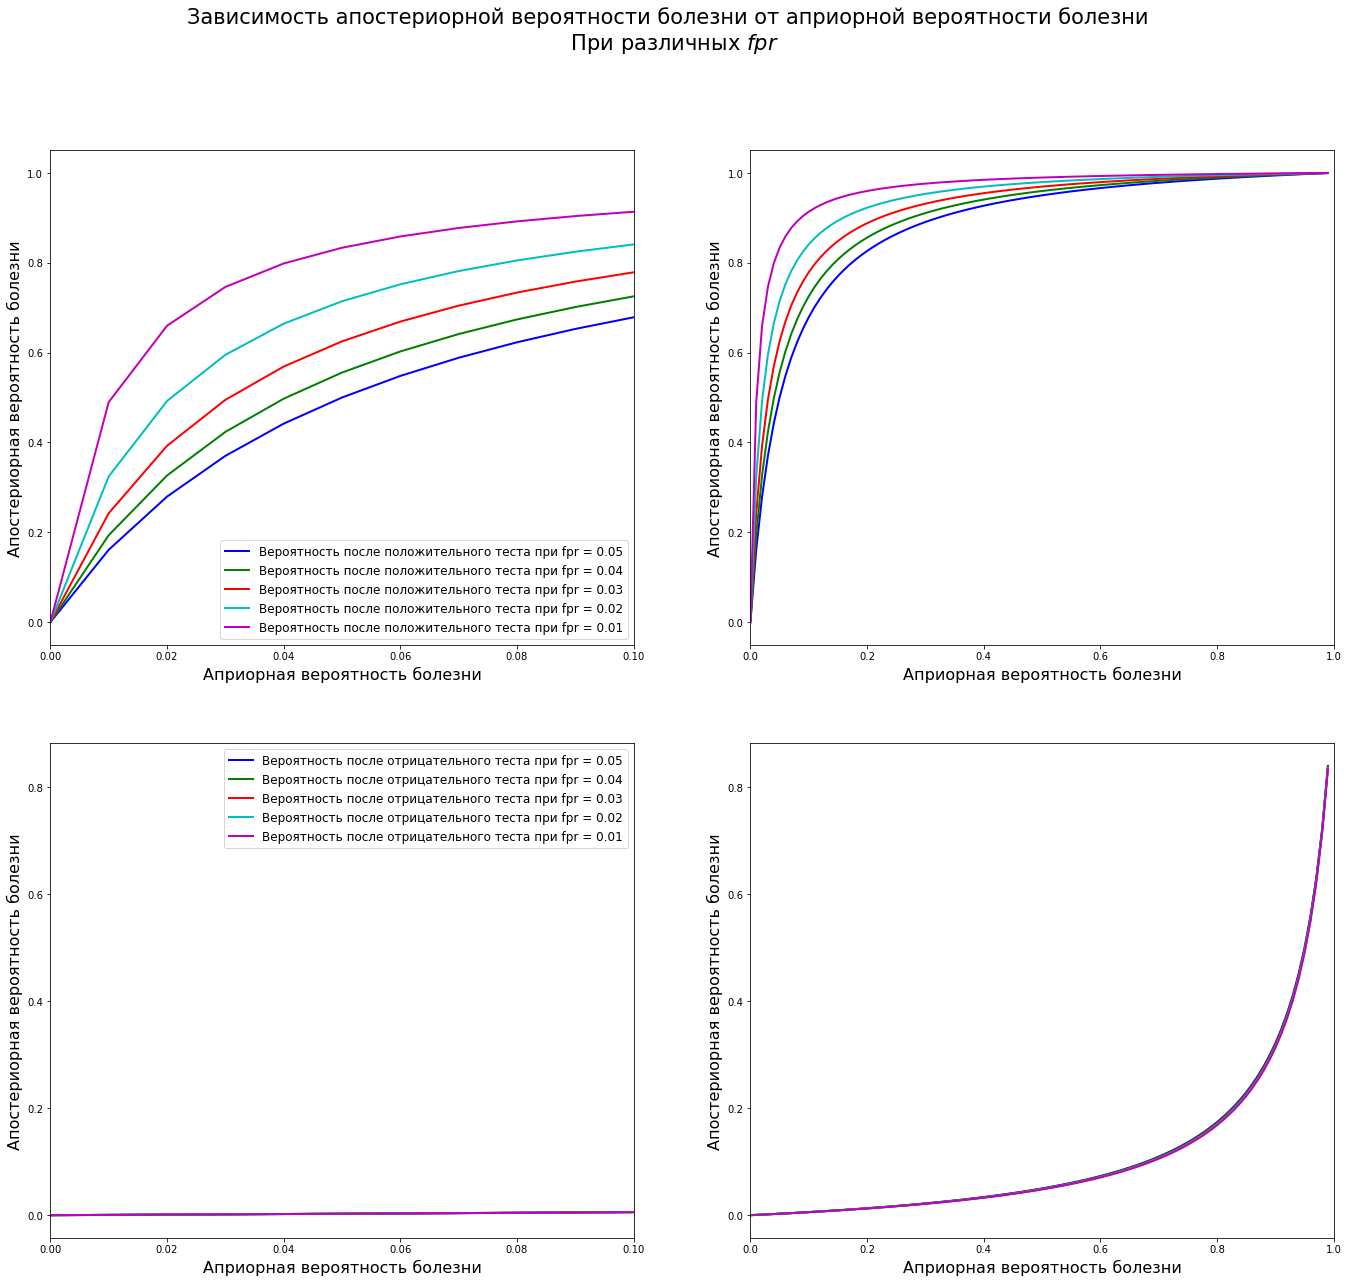

In [5]:
plot_fpr_fnr(fpr=True)

Как мы видим апостериорная вероятность болезни при положительном тесте резко возрастает и затем около 0.2 уменьшает скорость своего роста. Чем меньше вероятность ошибится со здоровым человеком назвав его больным, тем быстрее рост апостериорной вероятности болезни при положительном тесте.

Если же посмотреть на графики при отрицательном тесте. Там же апостериорные вероятности начинают быстро расти примерно около 0.6. И значения положительного теста на здоровом человеке практически не влияют на скорость роста.

Теперь посмотрим график зависимости апостериорной вероятности болезни при уменьшении $fnr$

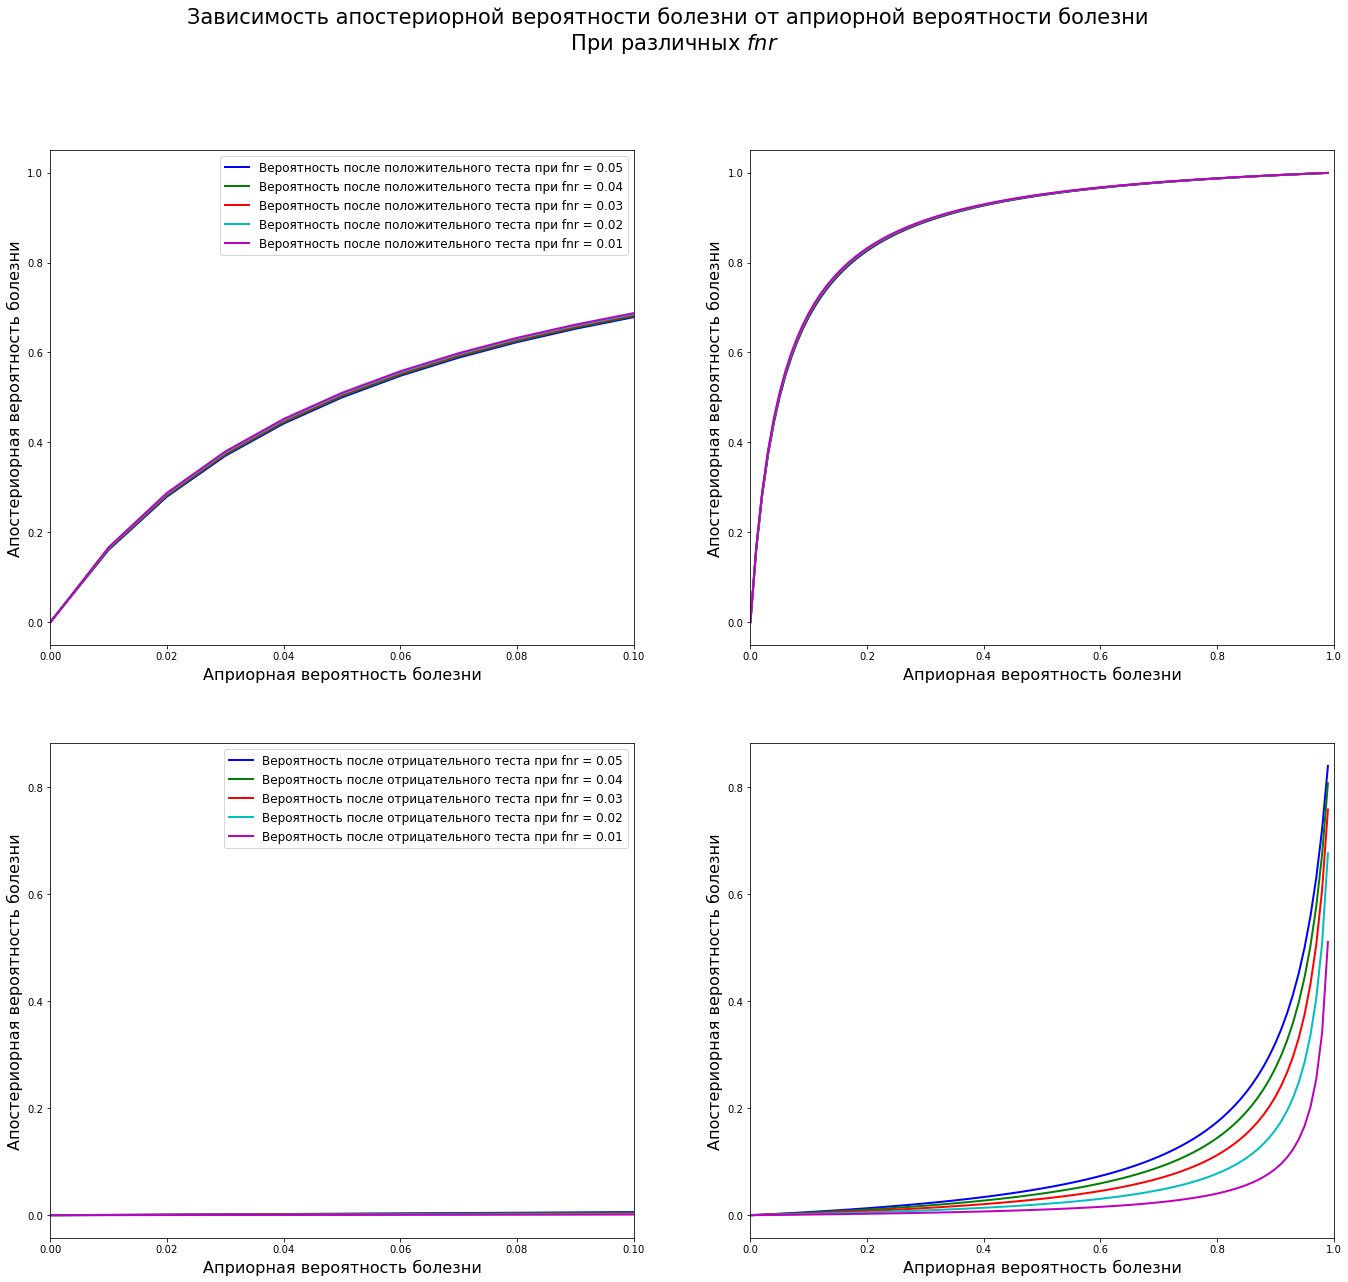

In [6]:
plot_fpr_fnr(fpr=False)

Как мы видим апостериорная вероятность болезни при положительном тесте также резко возрастает и затем около 0.2 уменьшает скорость своего роста. Но на него почти не влияет не нахождение болезни у больного.

Если же посмотреть на графики при отрицательном тесте. Там же апостериорные вероятности начинают быстро расти примерно около 0.6. Но вероятность отрицательного теста у больного сильно влияет на апостериорную вероятность болезни, уменьшая шанс быть больным при отрицательном тесте.

Предположим, что мы можем в 2 раза уменьшить ту или иную ошибку. Возьмем население в 1000000 человек. И предположим, что болеет 1%. Населения

In [7]:
population = 1000000
fpr_pop = (compute_posterior(data=1, fpr=0.025) - compute_posterior(data=1)) * population
fnr_pop = (compute_posterior(data=0, fnr=0.05) - compute_posterior(data=0, fnr=0.025)) * population
print("При уменьшении ошибки в 2 раза для fpr или fnr")
print(f"""Верно определиться болезнь у {int(fpr_pop)} из {population}
Или мы упустим болеющих людей {int(fnr_pop)} из {population}
    """)

При уменьшении ошибки в 2 раза для fpr или fnr
Верно определиться болезнь у 116355 из 1000000
Или мы упустим болеющих людей 265 из 1000000
    


Кажется, что изначально вернее сконцентрировать свои силы на fpr. И более точно определять, что человек не болен. Меньше тратить время, силы и ещё одни тесты на здорового человека

# <center> Часть II: О линейной регрессии

> 1.) Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [8]:
data = pd.read_csv('owid-covid-data.csv')
data_ru = data[(data['location'] == 'Russia') & (data['date'] >= '2020-03-03')].sort_values(by='date')
data_ru['new_cases'].replace(0, 1, inplace=True)

train_size = 50
forecast_size = 70
data_ru = data_ru.iloc[:forecast_size]
train = data_ru.iloc[:train_size]
test = data_ru.iloc[train_size:forecast_size]

> 2.) Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

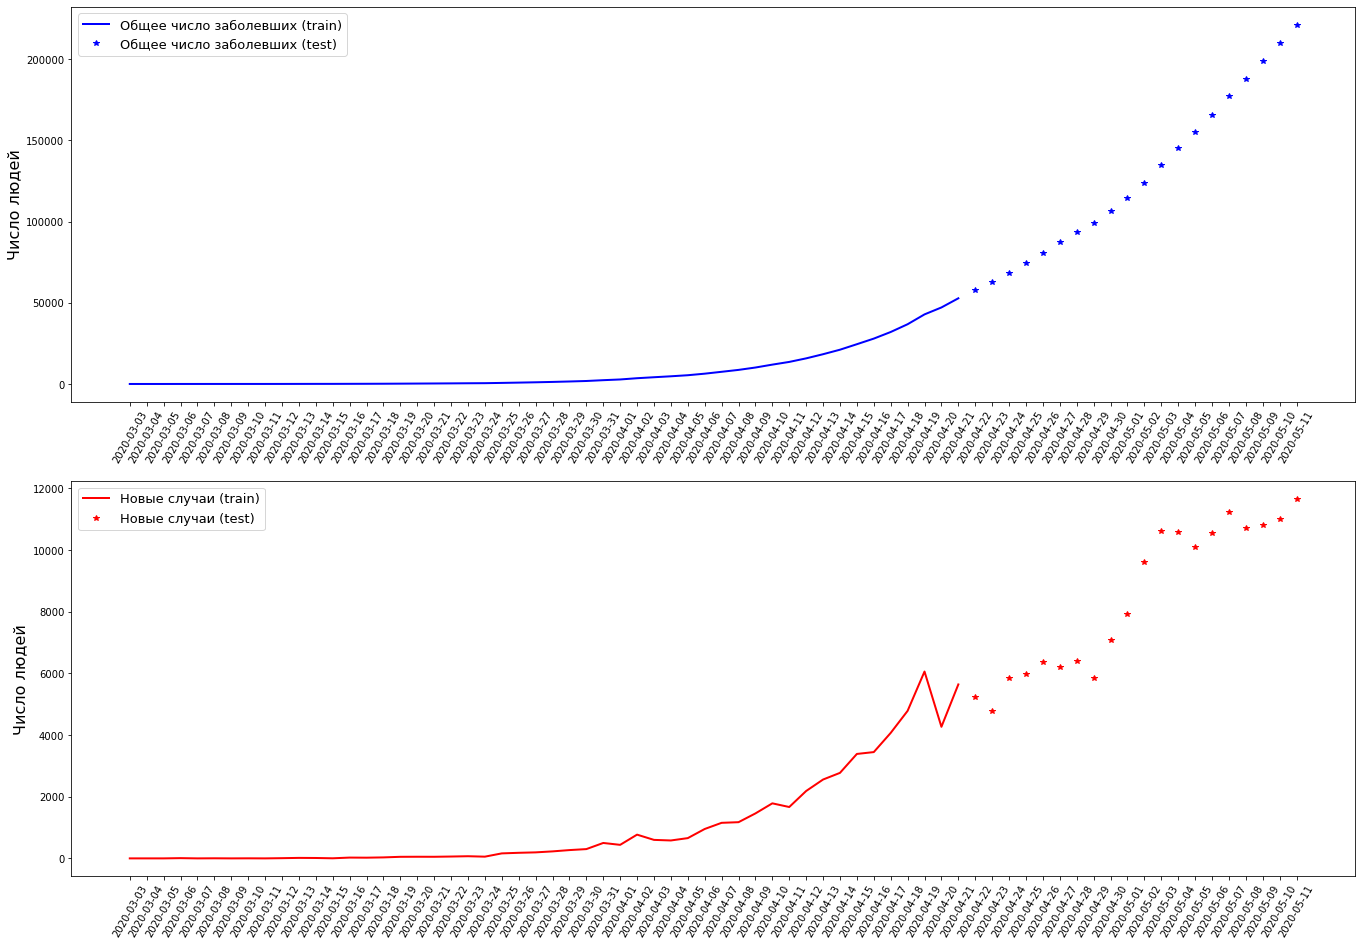

In [9]:
fig, ax = plt.subplots(2, figsize=(23, 16))
ax[0].plot(train['date'], train['total_cases'], 'b', linewidth=2, label=f'Общее число заболевших (train)')
ax[0].plot(test['date'], test['total_cases'], 'b*', linewidth=2, label=f'Общее число заболевших (test)')
ax[0].set_ylabel('Число людей', fontsize=legend_fontsize)
ax[0].set_xticklabels(data_ru['date'], rotation=60)
ax[0].legend(fontsize=13)

ax[1].plot(train['date'], train['new_cases'], 'r', linewidth=2, label='Новые случаи (train)')
ax[1].plot(test['date'], test['new_cases'], 'r*', linewidth=2, label='Новые случаи (test)')
ax[1].set_ylabel('Число людей', fontsize=legend_fontsize)

ax[1].set_xticklabels(data_ru['date'], rotation=60)
ax[1].legend(loc=2, fontsize=13)
plt.show()

> a.) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

Возьмем горизонт прогнозирования на 20 дней вперед

In [10]:
x_train = np.arange(0, train_size, 1)
x_test = np.arange(train_size, forecast_size, 1)

y_train_total = train['total_cases'].values
y_test_total = test['total_cases'].values

y_train_new = train['new_cases'].values
y_test_new = test['new_cases'].values

In [11]:
from sklearn.linear_model import LinearRegression

class MyRegression():
    
    def __init__(self, init_mu, init_sigma):
        self.init_mu = init_mu
        self.init_sigma = init_sigma

    @classmethod
    def bayesian_update(self, mu, sigma, x_matrix, y, sigma_noise):
        sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, x_matrix))
        mu_n = np.matmul(sigma_n, (np.matmul(np.linalg.inv(sigma), mu) + (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, y)))
        return mu_n, sigma_n

    def fit(self, x, y):
        X = np.hstack((np.ones((len(x), 1)), x))
        W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
        y_pred = np.matmul(X, W)
        sigma_noise = (y - y_pred).std()
        self.mu, self.sigma = MyRegression.bayesian_update(self.init_mu, self.init_sigma, X, y, sigma_noise)
        
    def predict(self, X):
        X = np.hstack((np.ones((len(X), 1)), X))
        return np.matmul(X, self.mu)
    
    def predict_samples(self, X, n_samples=200):
        X = np.hstack((np.ones((len(X), 1)), X))
        W_samples = np.random.multivariate_normal(self.mu, self.sigma, n_samples)
        results = []
        for W in W_samples:
            y = np.matmul(X, W)
            results.append(y)
            
        return np.array(results)

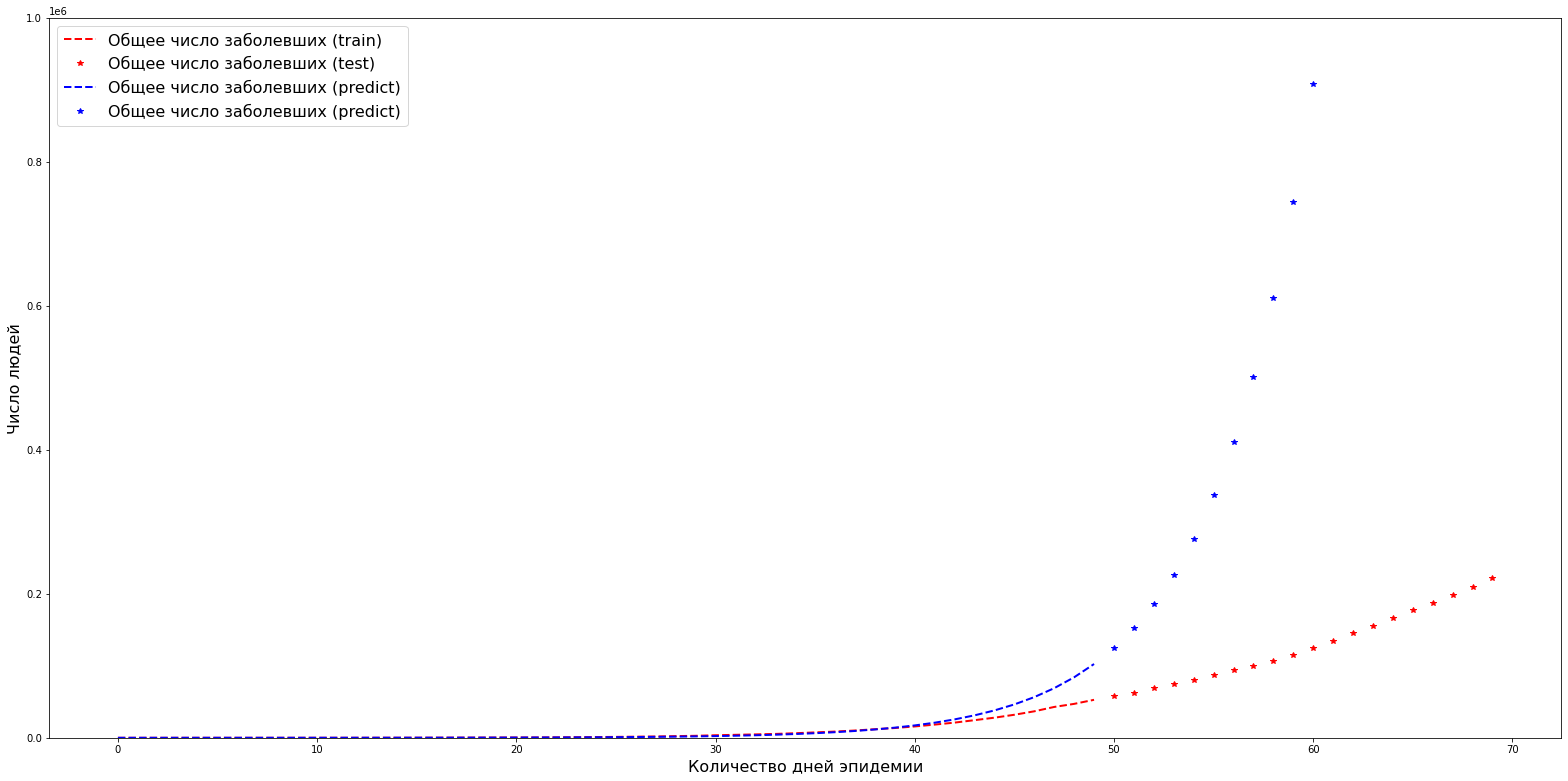

In [12]:
exp_model = MyRegression(np.array([0, 0]), 20 * np.array([[1, 0], [0, 1]]))
exp_model.fit(x_train.reshape(-1, 1), np.log(y_train_total))

y_train_total_pred = np.exp(exp_model.predict(x_train.reshape(-1, 1)))
y_test_total_pred = np.exp(exp_model.predict(x_test.reshape(-1, 1)))

fig = plt.figure(figsize=(21, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x_train, y_train_total, 'r--', linewidth=2, label=f'Общее число заболевших (train)')
axes.plot(x_test, y_test_total, 'r*', linewidth=2, label=f'Общее число заболевших (test)')
axes.plot(x_train, y_train_total_pred, 'b--', linewidth=2, label=f'Общее число заболевших (predict)')
axes.plot(x_test, y_test_total_pred, 'b*', linewidth=2, label=f'Общее число заболевших (predict)')
axes.set_ylabel('Число людей', fontsize=legend_fontsize)
axes.set_xlabel('Количество дней эпидемии', fontsize=legend_fontsize)
axes.set_ylim((0, 10**6))
axes.legend(fontsize=16)

plt.show()

Как мы видим результат не удался успехом, экспонента имеет слишком большой рост

> b.) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [13]:
from scipy.stats import multivariate_normal

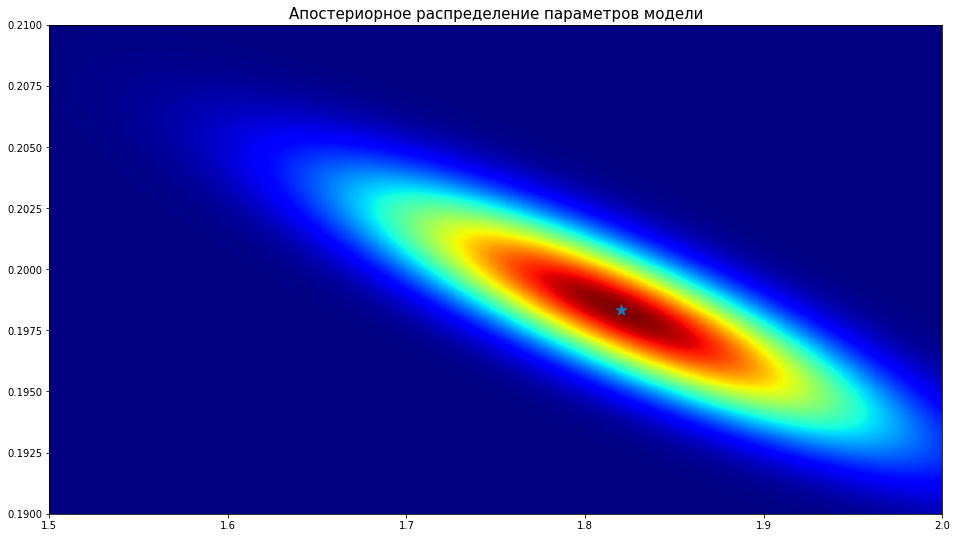

In [14]:
N = 1000

X = np.linspace(1.5, 2, N)
Y = np.linspace(0.19, 0.21, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=exp_model.mu, cov=exp_model.sigma)
plt.figure(figsize=(16, 9))
plt.xlim(1.5, 2)
plt.ylim(0.19, 0.21)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.scatter(exp_model.mu[0], exp_model.mu[1], marker='*', s=120)
plt.title('Апостериорное распределение параметров модели', fontsize=15)

plt.show()

> c.) Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [15]:
def myplot_sample_lines(model, X, n=20):
    y_list = np.exp(model.predict_samples(X.reshape(-1, 1), n_samples=n))

    plt.figure(figsize=(21, 9))
    for y in y_list:
        plt.plot(X, y, 'k-', lw=0.1)
    lower_bound = np.mean(y_list, axis=0) - np.std(y_list, axis=0) 
    upper_bound = np.mean(y_list, axis=0) + np.std(y_list, axis=0)

    plt.scatter(x_train, y_train_total, label='Данные обучающей выборки', marker='*', color='r')
    plt.scatter(x_test, y_test_total, label='Данные тестовой выборки', marker='*', color='b')
    plt.fill_between(X, lower_bound, upper_bound, color=palette[1], alpha=.3, label='Дисперсия предсказаний')
    plt.xlim(40, 70)
    
    plt.title('Сэмплированные экспоненты', fontsize=21)
    plt.ylabel('Число людей', fontsize=legend_fontsize)
    plt.xlabel('Количество дней эпидемии', fontsize=legend_fontsize)
    plt.legend(fontsize=legend_fontsize);
    plt.show()

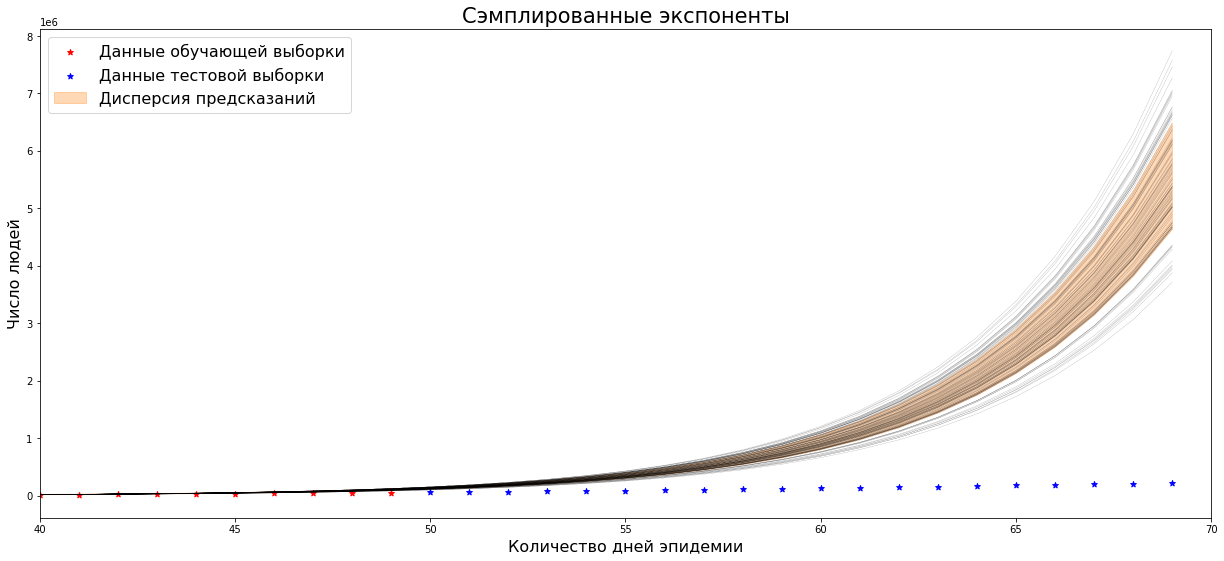

In [16]:
X = np.hstack((x_train, x_test))
myplot_sample_lines(exp_model, X, 100)

Определим количество заболевших заболевших к 1 маю, 1 июню, 1 сентябрю

In [17]:
def get_sick_number(model, day_str):
    day = pd.to_datetime(day_str)
    x = np.array([[(day - pd.to_datetime('2020-03-03')).days]])
    return int(np.exp(model.predict(x)))

In [18]:
for word, day in zip(['Мая', 'Июня', 'Сентября'], ['2020-05-01', '2020-06-01', '2020-09-01']):  
    print(f"К 1 {word} количество заболевших: {get_sick_number(exp_model, day)}")

К 1 Мая количество заболевших: 744579
К 1 Июня количество заболевших: 348238610
К 1 Сентября количество заболевших: 29217711677932296


С увеличением количества заболевших, модель предсказывает уже невозможные количество заболевших:)

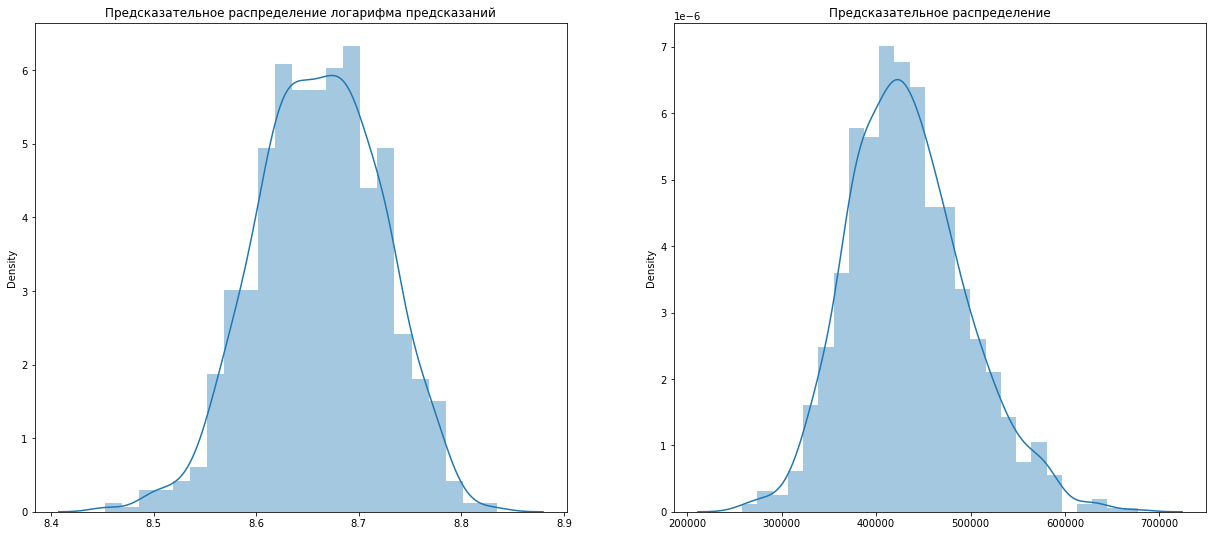

In [19]:
N = 1000

x_sample = np.hstack((x_train, x_test))
y_samples = np.exp(exp_model.predict_samples(x_sample.reshape(-1, 1), n_samples=N))
y_samples_log = exp_model.predict_samples(x_sample.reshape(-1, 1), n_samples=N)
y_samples = np.exp(y_samples_log)


fig, axis = plt.subplots(1, 2, figsize=(21, 9))
sns.distplot(y_samples_log.mean(axis=1), ax=axis[0])
axis[0].set_title('Предсказательное распределение логарифма предсказаний')
sns.distplot(y_samples.mean(axis=1), ax=axis[1])
axis[1].set_title('Предсказательное распределение');